# Battery Consumption Analysis

## Jonathan Camenzuli

Source code is part of my Final Year Project in Computer Engineering (2022/23) entitled "Miniature implementation of an IoT-based Smart City"

In [1]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.sans-serif'] = 'Lato'
# mpl.rcParams['figure.figsize'] = (6.4,4.8)

## Helper Functions

In [3]:
def get_merged_data(current_df, label_df):
    
    # Convert the timestamps to datetime objects
    current_df_copy = current_df.copy()
    label_df_copy = label_df.copy()

    current_df_copy['Time'] = pd.to_datetime(current_df_copy['Time'], format='%H:%M:%S.%f').dt.time
    label_df_copy['Timestamps'] = pd.to_datetime(label_df_copy['Timestamps'], format='%H:%M:%S.%f').dt.time

    # Remove the decimal point from timestamps
    current_df_copy['Time'] = current_df_copy['Time'].apply(lambda x: x.strftime('%H:%M:%S'))
    label_df_copy['Timestamps'] = label_df_copy['Timestamps'].apply(lambda x: x.strftime('%H:%M:%S'))

    # Merge the dataframes based on the timestamp column
    merged_data = pd.merge(current_df_copy, label_df_copy, left_on='Time', right_on='Timestamps', how='left')
    merged_data.drop(['Timestamps'], axis=1, inplace=True)
    return merged_data

In [4]:
def plot_data(data):
    t = np.arange(len(data['Current (mA)']))

    # Plot the data
    plt.figure()
    plt.plot(t, data['Current (mA)'])
    plt.xlabel('Index')
    plt.ylabel('Current (mA)')
    plt.title('Current Measurement')
    plt.grid(True)
    plt.show()

In [5]:
def plot_data_markers(data):
    t = np.arange(len(data['Current (mA)']))

    # Plot the data
    plt.figure()
    plt.plot(t, data['Current (mA)'])
    plt.xlabel('Index')
    plt.ylabel('Current (mA)')
    plt.title('Current Measurement')
    plt.grid(True)

    for index, row in data.iterrows():
        if not pd.isna(row['Labels']):
            print(index, data['Labels'][index])
            plt.axvline(x=index, color='r', linestyle='--')

    plt.show()

## Car Park Sensor

### Change in State

In [6]:
current_cps_cis_df = pd.read_csv('./cps/cps_cis_data.csv')
label_cps_cis_df = pd.read_csv('./cps/cis_timestamps.csv')

In [7]:
cps_cis_merged_df = get_merged_data(current_cps_cis_df, label_cps_cis_df)

cps_cis_merged_df

,Time,Current (mA),Labels
0,19:37:06,34.2,NaN
1,19:37:07,34.4,NaN
2,19:37:08,34.6,NaN
3,19:37:09,34.4,NaN
4,19:37:10,34.7,NaN
...,...,...,...
445,19:44:33,22.6,NaN
446,19:44:34,22.3,NaN
447,19:44:35,22.8,NaN
448,19:44:36,22.8,NaN


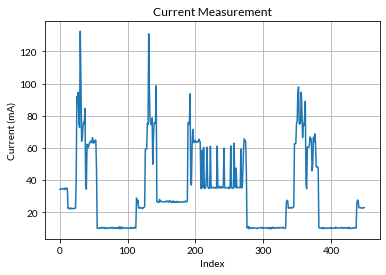

In [8]:
plot_data(cps_cis_merged_df)

11 Setup and Collecting Data From Sensors
21 Change in State Detected
22 Created JSON document
23 Setting up Modem
34 Connecting to ISP
50 Sending Packet to CoAP Server
52 Disconnecting from ISP, turning off Modem
53 Going to Sleep
115 Wake Up and Collecting Data From Sensors
126 Change in State Detected
127 Created JSON document
128 Setting up Modem
138 Connecting to ISP
261 IP Lookup GET Request Timeout (Trying again)
271 Sending Packet to CoAP Server
273 Disconnecting from ISP, turning off Modem
274 Going to Sleep
336 Wake Up and Collecting Data From Sensors
346 Change in State Detected
347 Created JSON document
348 Setting up Modem
358 Connecting to ISP
376 Sending Packet to CoAP Server
378 Disconnecting from ISP, turning off Modem
379 Going to Sleep
440 Wake Up and Collecting Data From Sensors


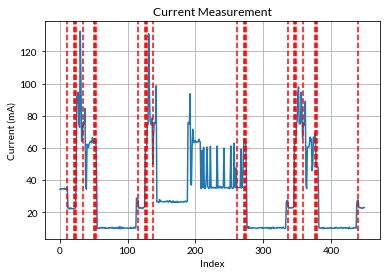

In [9]:
plot_data_markers(cps_cis_merged_df)

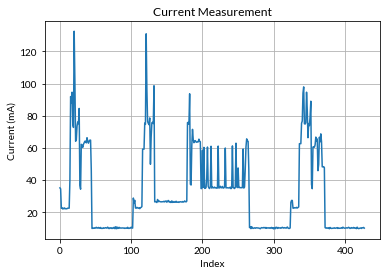

In [29]:
cps_cis_cycle_df = cps_cis_merged_df.drop(cps_cis_merged_df.index[438:], axis=0)
cps_cis_cycle_df = cps_cis_cycle_df.drop(cps_cis_cycle_df.index[0:10], axis=0)
cps_cis_cycle_df = cps_cis_cycle_df.reset_index()
plot_data(cps_cis_cycle_df)

1 Setup and Collecting Data From Sensors
11 Change in State Detected
12 Created JSON document
13 Setting up Modem
24 Connecting to ISP
40 Sending Packet to CoAP Server
42 Disconnecting from ISP, turning off Modem
43 Going to Sleep
105 Wake Up and Collecting Data From Sensors
116 Change in State Detected
117 Created JSON document
118 Setting up Modem
128 Connecting to ISP
251 IP Lookup GET Request Timeout (Trying again)
261 Sending Packet to CoAP Server
263 Disconnecting from ISP, turning off Modem
264 Going to Sleep
326 Wake Up and Collecting Data From Sensors
336 Change in State Detected
337 Created JSON document
338 Setting up Modem
348 Connecting to ISP
366 Sending Packet to CoAP Server
368 Disconnecting from ISP, turning off Modem
369 Going to Sleep


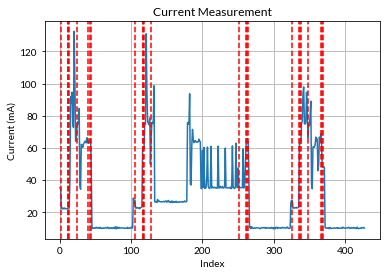

In [30]:
plot_data_markers(cps_cis_cycle_df)

### Same State

In [31]:
current_cps_ss_df = pd.read_csv('./cps/cps_ss_data.csv')
label_cps_ss_df = pd.read_csv('./cps/ss_timestamps.csv')

In [32]:
cps_ss_merged_df = get_merged_data(current_cps_ss_df, label_cps_ss_df)

cps_ss_merged_df

,Time,Current (mA),Labels
0,20:08:28,9.7,NaN
1,20:08:29,9.9,NaN
2,20:08:30,9.8,NaN
3,20:08:32,9.8,NaN
4,20:08:33,10.0,NaN
...,...,...,...
234,20:12:29,27.1,Wake Up and Collecting Data From Sensors
235,20:12:30,22.1,NaN
236,20:12:31,22.2,NaN
237,20:12:32,22.8,NaN


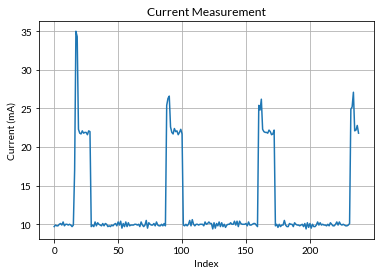

In [33]:
plot_data(cps_ss_merged_df)

18 Setup and Collecting Data From Sensors
28 No Change in State, Going to Sleep
90 Wake Up and Collecting Data From Sensors
100 No Change in State, Going to Sleep
162 Wake Up and Collecting Data From Sensors
172 No Change in State, Going to Sleep
234 Wake Up and Collecting Data From Sensors


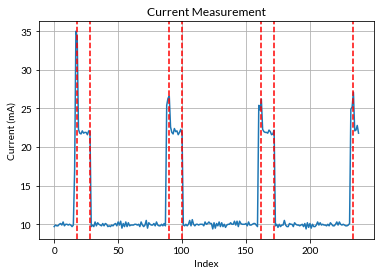

In [34]:
plot_data_markers(cps_ss_merged_df)

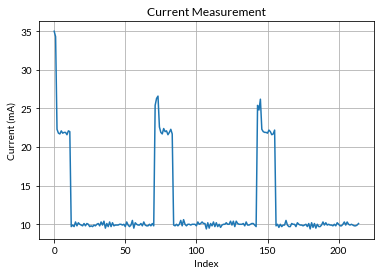

In [41]:
cps_ss_cycle_df = cps_ss_merged_df.drop(cps_ss_merged_df.index[232:], axis=0)
cps_ss_cycle_df = cps_ss_cycle_df.drop(cps_ss_cycle_df.index[0:17], axis=0)
cps_ss_cycle_df = cps_ss_cycle_df.reset_index()
plot_data(cps_ss_cycle_df)

1 Setup and Collecting Data From Sensors
11 No Change in State, Going to Sleep
73 Wake Up and Collecting Data From Sensors
83 No Change in State, Going to Sleep
145 Wake Up and Collecting Data From Sensors
155 No Change in State, Going to Sleep


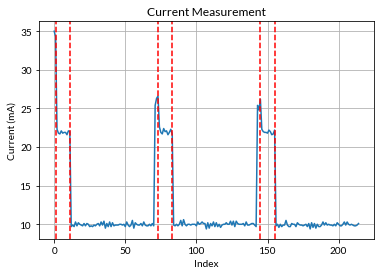

In [42]:
plot_data_markers(cps_ss_cycle_df)

## Air Quality Monitoring System

In [16]:
current_aqms_df = pd.read_csv('./aqms/aqms_data.csv')
label_aqms_df = pd.read_csv('./aqms/timestamps.csv')

In [17]:
aqms_merged_df = get_merged_data(current_aqms_df, label_aqms_df)

aqms_merged_df

,Time,Current (mA),Labels
0,13:46:13,58.2,NaN
1,13:46:14,58.2,NaN
2,13:46:15,59.5,NaN
3,13:46:16,58.1,NaN
4,13:46:17,57.7,NaN
...,...,...,...
4358,15:00:41,47.3,NaN
4359,15:00:42,41.4,NaN
4360,15:00:43,41.9,NaN
4361,15:00:44,41.7,NaN


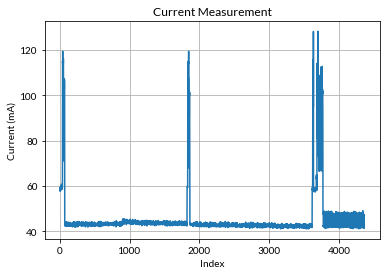

In [18]:
plot_data(aqms_merged_df)

11 Setup and Collecting Data From Sensors
35 Created JSON document
36 Setting up Modem
47 Connecting to ISP
65 Sending Packet to CoAP Server
66 Disconnecting from ISP, turning off Modem
67 Going to Sleep
1825 Wake Up and Collecting Data From Sensors
1830 Created JSON document
1831 Setting up Modem
1842 Connecting to ISP
1858 Sending Packet to CoAP Server
1860 Disconnecting from ISP, turning off Modem
1861 Going to Sleep
3617 Wake Up and Collecting Data From Sensors
3623 Created JSON document
3624 Setting up Modem
3634 Connecting to ISP
3765 Sending Packet to CoAP Server
3767 Disconnecting from ISP, turning off Modem
3768 Going to Sleep


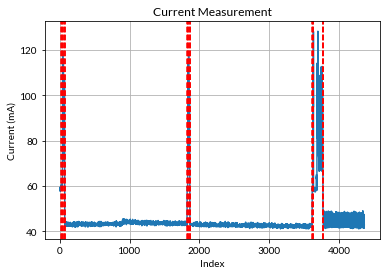

In [19]:
plot_data_markers(aqms_merged_df)

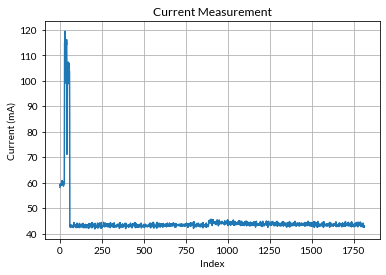

In [20]:
aqms_cycle_df = aqms_merged_df.drop(aqms_merged_df.index[1822:], axis=0)
aqms_cycle_df = aqms_cycle_df.drop(aqms_cycle_df.index[0:10], axis=0)
aqms_cycle_df = aqms_cycle_df.reset_index()
plot_data(aqms_cycle_df)

1 Setup and Collecting Data From Sensors
25 Created JSON document
26 Setting up Modem
37 Connecting to ISP
55 Sending Packet to CoAP Server
56 Disconnecting from ISP, turning off Modem
57 Going to Sleep


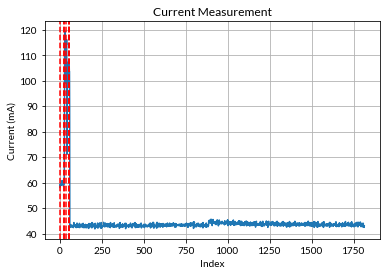

In [21]:
plot_data_markers(aqms_cycle_df)

## Fire Detection System

In [22]:
current_fds_df = pd.read_csv('./fds/fds_data.csv')
label_fds_df = pd.read_csv('./fds/timestamps.csv')

In [23]:
fds_merged_df = get_merged_data(current_fds_df, label_fds_df)

fds_merged_df

,Time,Current (mA),Labels
0,00:30:06,42.5,NaN
1,00:30:07,43.1,NaN
2,00:30:08,43.2,NaN
3,00:30:09,42.5,NaN
4,00:30:10,43.2,NaN
...,...,...,...
418,00:37:12,29.7,NaN
419,00:37:13,47.1,NaN
420,00:37:14,44.1,NaN
421,00:37:15,44.2,NaN


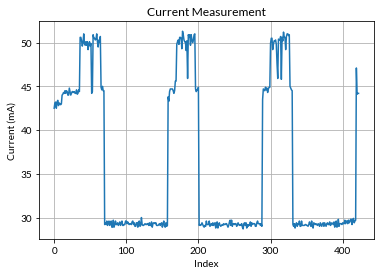

In [24]:
plot_data(fds_merged_df)

11 Setup and Collecting Data From Sensors
36 Created JSON document
37 Setting up Modem
47 Connecting to ISP
63 Sending Packet to CoAP Server
65 Disconnecting from ISP, turning off Modem
163 Wake Up and Collecting Data From Sensors
168 Created JSON document
169 Setting up Modem
180 Connecting to ISP
193 Sending Packet to CoAP Server
195 Disconnecting from ISP, turning off Modem
293 Wake Up and Collecting Data From Sensors
298 Created JSON document
299 Setting up Modem
310 Connecting to ISP
324 Sending Packet to CoAP Server
326 Disconnecting from ISP, turning off Modem


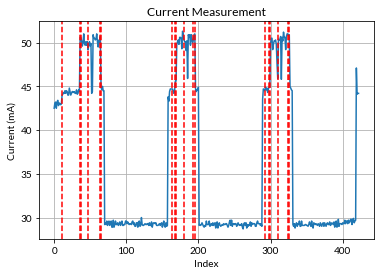

In [25]:
plot_data_markers(fds_merged_df)

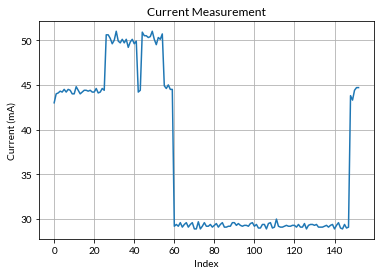

In [26]:
fds_cycle_df = fds_merged_df.drop(fds_merged_df.index[163:], axis=0)
fds_cycle_df = fds_cycle_df.drop(cps_cycle_df.index[0:10], axis=0)
fds_cycle_df = fds_cycle_df.reset_index()
plot_data(fds_cycle_df)

1 Setup and Collecting Data From Sensors
26 Created JSON document
27 Setting up Modem
37 Connecting to ISP
53 Sending Packet to CoAP Server
55 Disconnecting from ISP, turning off Modem


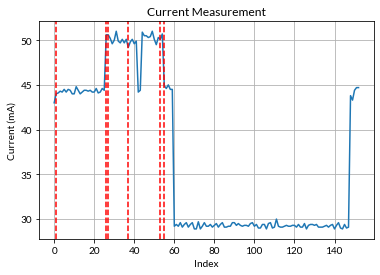

In [27]:
plot_data_markers(fds_cycle_df)